##### Copyright 2024 Google LLC.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

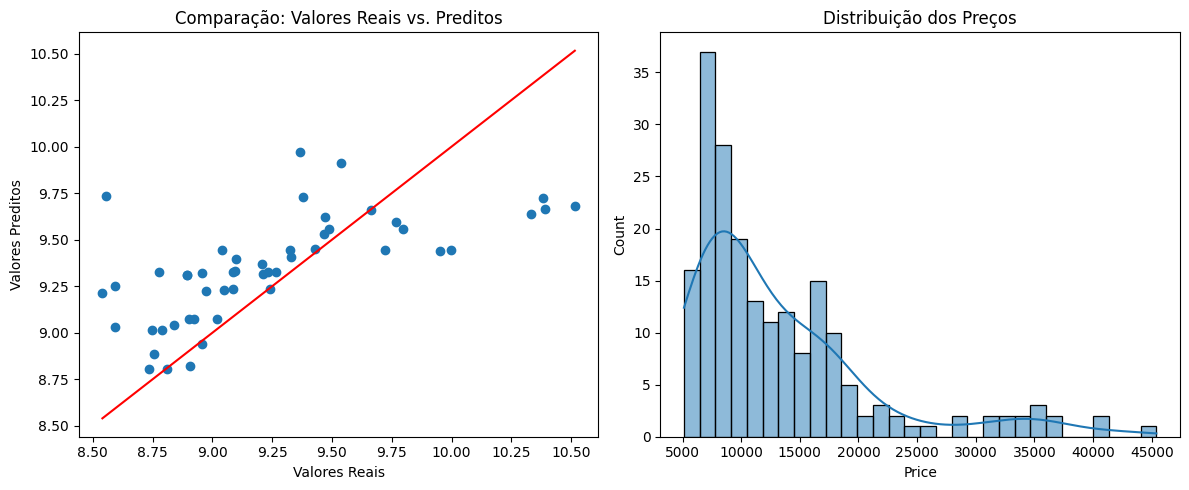

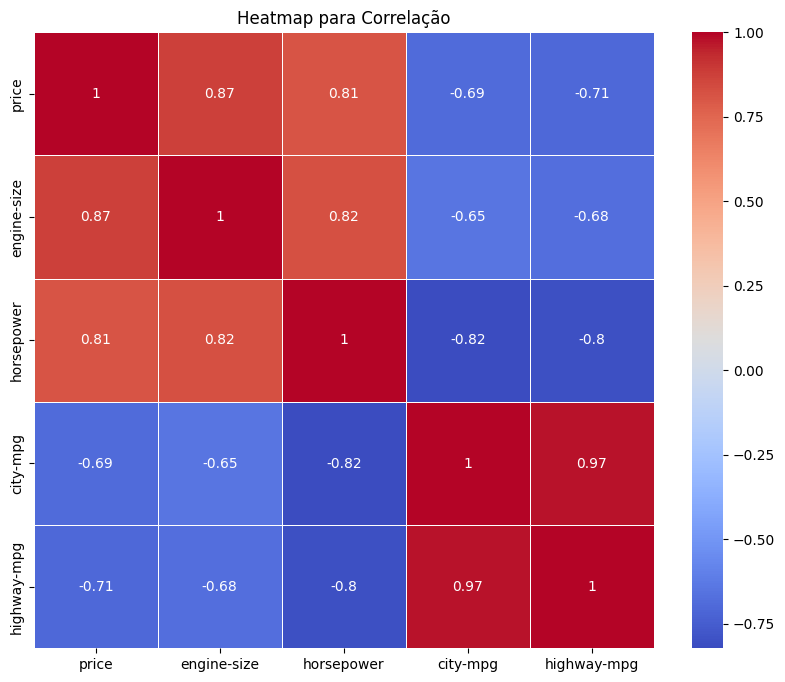

In [3]:
#bibliotecas importadas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

#le o arquivo csv com pandas
df=pd.read_csv('/content/Automobile_data.csv')

#lista os nomes das colunas
df.columns.to_list()


#lista o tipo de dados das colunas
df.info()

#comverte as strings em Nan depois apaga
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df=df.dropna()

#converte a coluna de valores int para float
df['price']=pd.to_numeric(df['price'],downcast='float')

#converte horsepower para float
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df=df.dropna()

df['horsepower']=pd.to_numeric(df['horsepower'],downcast='float')

#cria uma coluna logprice com o logaritmo natural
df['logPrice']=np.log(df['price'])

#constroi um array numpy com as colunas e printa
#usa o método do PANDAS
valores=df[['engine-size','horsepower','city-mpg','highway-mpg']].to_numpy()
print(df['horsepower'])

#calcula a média com numpy
medias=np.mean(valores,axis=1,keepdims=True)
print('O valor das médias é: ', medias)

#calcula o desvio padrão com numpy
std=np.std(valores,axis=1,keepdims=True)
print('O valor do desvio padrão é: ', std)

#cria um novo array com média,valores e desvio padrão
X=(valores-medias)/std

#cria um array numpy chamado y com a coluna logprice
y=df['logPrice'].to_numpy()

#instaciando a classe e separando a amostra e random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#instancia LinearRegression e cria um .fit para o conjunto de teste
reg=LinearRegression()
reg.fit(X_train,y_train)

#método score para saber o valor de R2
reg.score(X_train,y_train)
print(reg.score(X_train,y_train))


#coeficientes
reg.coef_
print(reg.coef_)

#valor dos interceptos
reg.coef_
print('O valor dos interceptos é: ',reg.coef_)

#cria um .fit para o teste
reg2=LinearRegression()
reg2.fit(X_test,y_test)

#prediçao com modelo ajustado
reg2.predict(X_test)

#valor entre R2 e x e y do modelo treinado
reg2.score(X_test,y_test)
print('O valor entre R2 e x e y do modelo treinado é: ',reg2.score(X_test,y_test))

plt.figure(figsize=(12, 5))

# Gráfico de dispersão das previsões
y_pred = reg.predict(X_test)
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação: Valores Reais vs. Preditos')

# Histograma dos preços
plt.subplot(1, 2, 2)
sns.histplot(df['price'], bins=30, kde=True)
plt.xlabel('Price')
plt.title('Distribuição dos Preços')

plt.tight_layout()
plt.show()

#Heatmap para correlações
plt.figure(figsize=(10, 8))
correlacao=df[['price','engine-size','horsepower','city-mpg','highway-mpg']].corr()
sns.heatmap(correlacao,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Heatmap para Correlação')
plt.show()

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API Python quickstart

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/quickstart_colab"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This tutorial shows you how to get started with the Gemini API using the Python SDK.

## Prerequisites

You can run this tutorial in Google Colab, which doesn't require additional environment configuration.

Alternatively, to complete this quickstart locally, see the Python guidance in [Get started with the Gemini API](https://ai.google.dev/tutorials/quickstart).

## Install the SDK

The Python SDK for the Gemini API is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 1.1 MB/s eta 0:00:00


## Set up your API key

To use the Gemini API, you'll need an API key. If you don't already have one, create a key in Google AI Studio.

<a class="button" href="https://aistudio.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`. Then pass the key to the SDK:

In [ ]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Initialize the Generative Model

Before you can make any API calls, you need to initialize the Generative Model.

In [ ]:
model = genai.GenerativeModel('gemini-pro')

## Generate text

In [ ]:
response = model.generate_content("Write a story about a magic backpack.")
print(response.text)

In the bustling city of Evermore, there lived an ordinary schoolgirl named Anya. Little did she know that her life was about to take an extraordinary turn when she discovered a peculiar backpack.

One morning, as Anya rummaged through her grandmother's attic, her eyes fell upon a dusty old backpack. Intrigued, she picked it up and unzipped it. Inside, she found a jumble of papers, trinkets, and a small, glowing crystal.

As Anya reached out to touch the crystal, the backpack hummed with a soft energy. Suddenly, strange things began to happen. The zippers moved on their own, opening and closing compartments that revealed hidden pockets. Book pages turned themselves, revealing forgotten spells and incantations.

Anya realized that this was no ordinary backpack. It was a magical backpack, imbued with ancient enchantments. Excited and overwhelmed, she carefully put on the backpack and felt its power surge through her.

The next day at school, Anya couldn't resist testing out her new secret

## What's next

To learn more about working with the Gemini API, see the [Python tutorial](https://ai.google.dev/tutorials/python_quickstart).

If you're new to generative AI models, you might want to look at the
[concepts guide](https://ai.google.dev/docs/concepts) and the
[Gemini API overview](https://ai.google.dev/docs/gemini_api_overview).